# 고랭지 배추의 생산량 감소 문제

### ◇ 문제 배경
최근 **이상기후**로 인해 고랭지 배추의 생육 부진과 생산량 감소가 발생하여, 가을 배추 수급이 불안정해지고 **배추 값 폭등**을 야기하고 있다.

### ◇ 강원특별자치도 현황
전체 **90% 이상의 고랭지 배추 생산**이 강원특별자치도에서 이루어지고 있어, 강원대 학생으로서 이 문제에 주목하게 되었다.

### ◇ 분석 과정
고랭지 배추 생산량이 감소하는 원인을 다음과 같이 설정하여 분석하였다.
1. **농가 규모 감소**: 재배면적을 농가 규모의 지표로 삼아 생산량과 상관관계를 분석함.
2. **이상기후로 인한 생산량 감소**: 기온과 강수량을 지표로 삼아 회귀분석을 함.




In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.font_manager as fm
from tkinter.font import BOLD
import statsmodels.api as sm
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()


올해 가을, **배추 가격 폭등**으로 인해 많은 부정적인 뉴스가 쏟아져 나왔다.

김장철을 앞두고 배춧값이 크게 올라 ***금배추***라는 단어도 생기고, 마트에서는 **배추 구매 개수 제한**을 둘 정도로 심각한 문제가 발생했다.


뉴스 기사 중 **2024년 10월**의 고랭지 배추를 주제로 **상위 50개의 단어 구름**을 생성하였습니다.


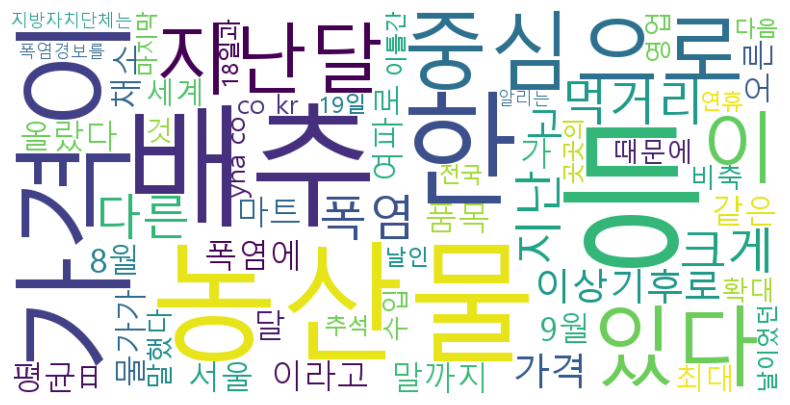

In [ ]:
urls = [
    "https://www.yna.co.kr/view/AKR20241026023900030?input=1195m",
    "https://www.hankyung.com/article/2024102716067",
    "https://biz.sbs.co.kr/article/20000198329?division=NAVER",
    "https://imnews.imbc.com/news/2024/econo/article/6650203_36452.html",
    "https://economist.co.kr/article/view/ecn202410200005"
]

text = ""
for url in urls:
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # 기사 제목 추출
    title = soup.find('h3')
    if title:
        text += title.get_text() + " "
    
    # 기사 본문 추출
    content = soup.find_all('p')
    for paragraph in content:
        text += paragraph.get_text() + " "

if not text.strip():
    text = "해당 기사에서 내용을 추출할 수 없습니다."

stopwords = set(['토마토','초콜릿', '연합뉴스', 'EV9', '코코아', '커피', '기자'])

# 단어 구름 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords, max_words=60).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

단어 구름에서 볼 수 있듯이 배추의 가격이 이상기후인 폭염으로 인해 크게 올랐다는 것을 알 수 있었다.<br><br><br>

2018년부터 2022년까지의 고랭지 배추 생산량을 그래프로 표현하였다.<br>
또한 선형 예측 추세선으로 2025년까지의 예상 데이터를 출력하였다.

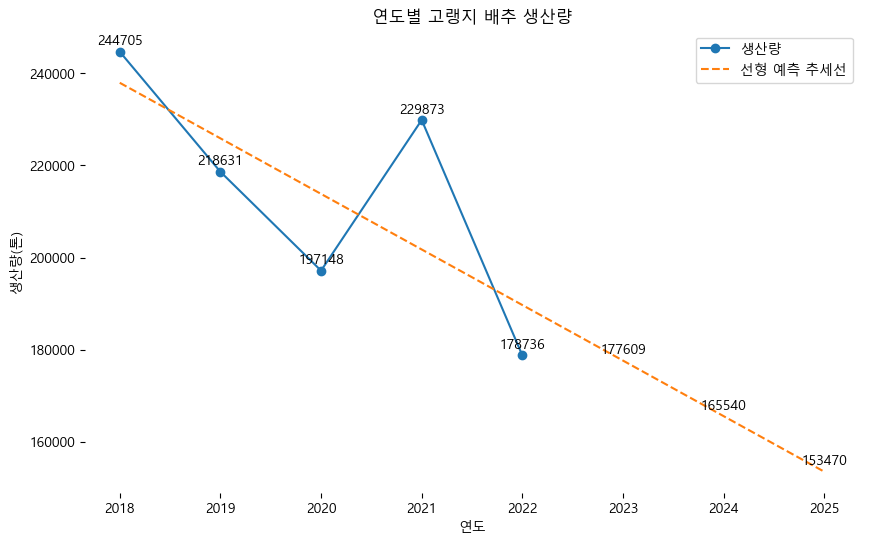

In [160]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 0]  # 연도
production = df.iloc[:, 1]  # 생산량

data = pd.DataFrame({'Years': years, 'Production': production})
data = data.dropna()

# 선형 회귀 모델 만들기
model = LinearRegression()
years_reshaped = np.array(data['Years']).reshape(-1, 1)
model.fit(years_reshaped, data['Production'])

trend = model.predict(years_reshaped)

future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_trend = model.predict(future_years)

all_years = np.concatenate([years_reshaped, future_years])
all_trend = np.concatenate([trend, future_trend])

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Production'], label='생산량', marker='o')
plt.plot(all_years, all_trend, label='선형 예측 추세선', linestyle='--')

for i, txt in enumerate(data['Production']):
    plt.annotate(f'{int(txt)}', (data['Years'].iloc[i], data['Production'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

for i, txt in enumerate(future_trend):
    plt.annotate(f'{int(txt)}', (future_years[i], future_trend[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('연도')
plt.ylabel('생산량(톤)')
plt.title('연도별 고랭지 배추 생산량')
plt.legend()

plt.grid(False)
plt.box(False)

plt.show()

연도별 고랭지 배추 생산량 그래프를 보면 고랭지 배추의 생산량이 지속적으로 **감소**하고 있는 추세임을 알 수 있었다.<br>
생산량 감소 요인으로 농가 규모 감소와 이상기후로 인한 생산량 감소로 예측하였다.<br>
먼저 농가 규모 감소 원인을 분석해보았다.

2018년부터 2023년까지의 고랭지 배추 재배면적을 꺾은선 그래프로 나타내고,<br>
재배면적과 생산량과의 상관분석을 실시 하였다. 또한 재배면적과 생산량을 분산형 그래프로 나타내었다.

상관계수: 0.71


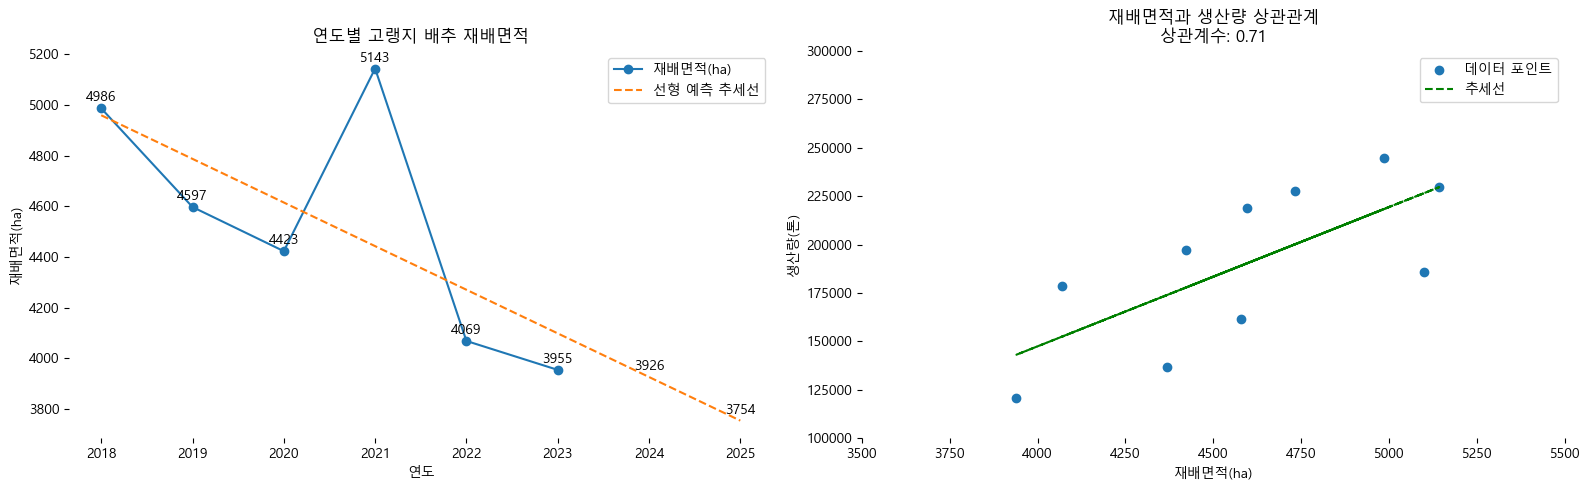

In [110]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'

# 연도별 고랭지 배추 재배면적 꺾은선 그래프
df1 = pd.read_excel(file_path, sheet_name='data1')
years = df1.iloc[:, 10]  # 연도
area = df1.iloc[:, 13]  # 재배면적

data1 = pd.DataFrame({'Years': years, 'Area': area})
data1 = data1.dropna()

model = LinearRegression()
years_reshaped = np.array(data1['Years']).reshape(-1, 1)
model.fit(years_reshaped, data1['Area'])
trend = model.predict(years_reshaped)

future_years = np.array([2024, 2025]).reshape(-1, 1)
future_trend = model.predict(future_years)

all_years = np.concatenate([years_reshaped, future_years])
all_trend = np.concatenate([trend, future_trend])

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(data1['Years'], data1['Area'], label='재배면적(ha)', marker='o')
plt.plot(all_years, all_trend, label='선형 예측 추세선', linestyle='--')

for i, txt in enumerate(data1['Area']):
    plt.annotate(f'{int(txt)}', (data1['Years'].iloc[i], data1['Area'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

for i, txt in enumerate(future_trend):
    plt.annotate(f'{int(txt)}', (future_years[i], future_trend[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('연도')
plt.ylabel('재배면적(ha)')
plt.title('연도별 고랭지 배추 재배면적')
plt.legend()
plt.grid(False)
plt.box(False)

# 재배면적과 생산량 분산형 그래프
df2 = pd.read_excel(file_path, sheet_name='data2')
area2 = df2.iloc[:, 1]  # 재배면적
production2 = df2.iloc[:, 2]  # 생산량

data2 = pd.DataFrame({'Area': area2, 'Production': production2})
data2 = data2.dropna()

correlation = data2.corr().loc['Area', 'Production']
print(f'상관계수: {correlation:.2f}')

model2 = LinearRegression()
area2_reshaped = np.array(data2['Area']).reshape(-1, 1)
model2.fit(area2_reshaped, data2['Production'])
trend2 = model2.predict(area2_reshaped)

plt.subplot(1, 2, 2)
plt.scatter(data2['Area'], data2['Production'], label='데이터 포인트', marker='o')
plt.plot(data2['Area'], trend2, label='추세선', linestyle='--', color='Green')

plt.xlabel('재배면적(ha)')
plt.ylabel('생산량(톤)')
plt.title(f'재배면적과 생산량 상관관계\n상관계수: {correlation:.2f}')
plt.legend()
plt.ylim(100000, 300000)
plt.xlim(3500, 5500)
plt.grid(False)
plt.box(False)

plt.tight_layout()
plt.show()


재배면적과 생산량의 상관계수는 0.71로 강한 양의 상관관계를 나타냄을 확인하였다.<br>
따라서 **재배면적 감소**는 **생산량 감소의 원인**이라고 할 수 있다. 

농가 규모가 감소하고 있는 큰 이유 중 하나로 낮은 이윤을 지목하였다. <br>
농가 이윤은 총 수익에서 생산비용을 뺀 값이고 생산비용은 경영비용에서 자가노동비, 유동자본 용역비, 고정자본 용역비, 토지 자본 용역비를 더한 값이다.<br>
전년도 농가 이윤이 적을 때 농가 규모가 줄어들 것으로 예상하고 상관분석을 하였다.<br>
또한 전년도 농가 이윤과 재배면적을 분산형 그래프로 시각화하였다.

상관계수: 0.41


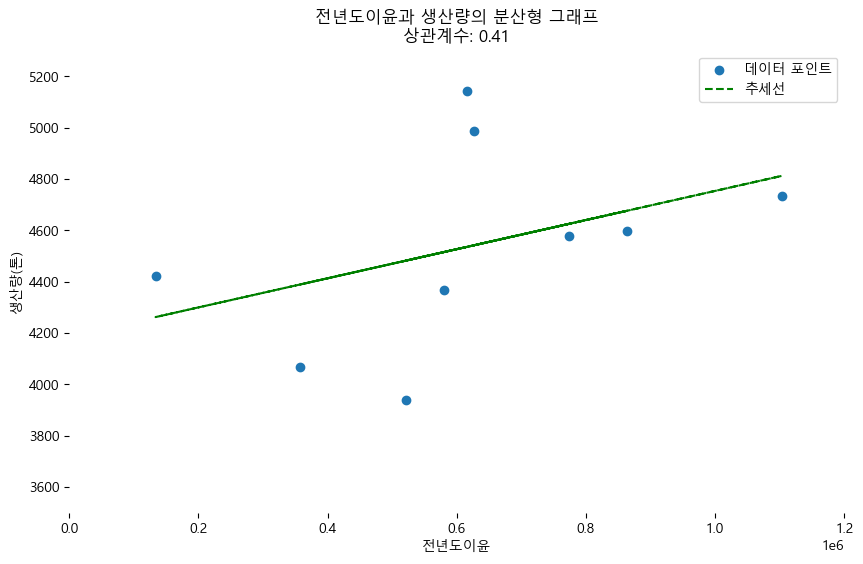

In [113]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data2')

area2 = df.iloc[:, 5]  # 농가이윤
production2 = df.iloc[:, 6]  # 재배면적

# 결측값 제거
data2 = pd.DataFrame({'Area': area2, 'Production': production2})
data2 = data2.dropna()

# 상관계수 계산
correlation = data2.corr().loc['Area', 'Production']
print(f'상관계수: {correlation:.2f}')

# 선형 회귀 모델 만들기
model2 = LinearRegression()
area2_reshaped = np.array(data2['Area']).reshape(-1, 1)
model2.fit(area2_reshaped, data2['Production'])
trend2 = model2.predict(area2_reshaped)

# 분산형 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data2['Area'], data2['Production'], label='데이터 포인트', marker='o')
plt.plot(data2['Area'], trend2, label='추세선', linestyle='--', color='green')

plt.xlabel('전년도이윤')
plt.ylabel('생산량(톤)')
plt.title(f'전년도이윤과 생산량의 분산형 그래프\n상관계수: {correlation:.2f}')
plt.legend()
plt.ylim(3500, 5300)
plt.xlim(0, 1200000)

plt.grid(False)
plt.box(False)

plt.show()

전년도 이윤과 생산량의 상관분석 결과 상관계수가 0.41로 약한 양의 상관관계에 있음을 알 수 있었다.<br>
그러므로 **전년도 이윤이 적으면** 다음 해 **농가 규모가 축소**된다는 것을 확인하였다.

현재 농가의 이윤이 매우 낮은 수준임을 보이기 위해 연도별 1포기당 이윤을 꺾은선 그래프로 나타내었다.

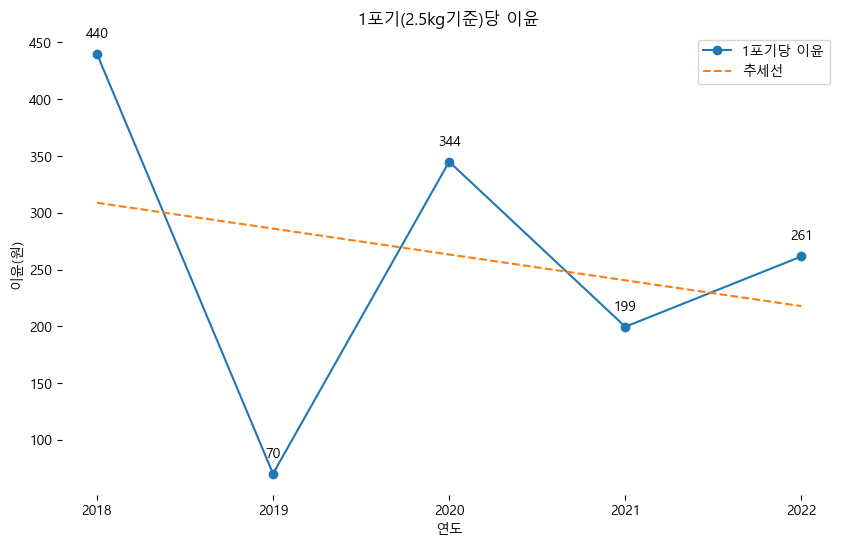

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 3]  # 연도
profit = df.iloc[:, 6]  # 1포기당 이윤

data = pd.DataFrame({'Years': years, 'Profit': profit})
data = data.dropna()

model = LinearRegression()
years_reshaped = np.array(data['Years']).reshape(-1, 1)
model.fit(years_reshaped, data['Profit'])

trend = model.predict(years_reshaped)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Profit'], label='1포기당 이윤', marker='o')
plt.plot(data['Years'], trend, label='추세선', linestyle='--')

for i, txt in enumerate(data['Profit']):
    plt.annotate(f'{int(txt)}', (data['Years'].iloc[i], data['Profit'].iloc[i]), textcoords="offset points", xytext=(0, 12), ha='center')

plt.xticks(ticks=np.arange(min(data['Years']), max(data['Years'])+1, 1), labels=[str(int(year)) for year in np.arange(min(data['Years']), max(data['Years'])+1, 1)])

plt.xlabel('연도')
plt.ylabel('이윤(원)')
plt.title('1포기(2.5kg기준)당 이윤')
plt.legend()

plt.grid(False)
plt.box(False)

plt.show()


배추 한 포기 당 농가의 이윤은 70원에서 440원 수준에 불과한 것을 알 수 있고<br>
소비자의 부담을 덜면서 농가의 이윤을 증대하는 방안이 필요하다.<br>
이에 따라서 생산비용을 절감해야 농가의 이윤을 증대할 수 있다고 생각하였다.

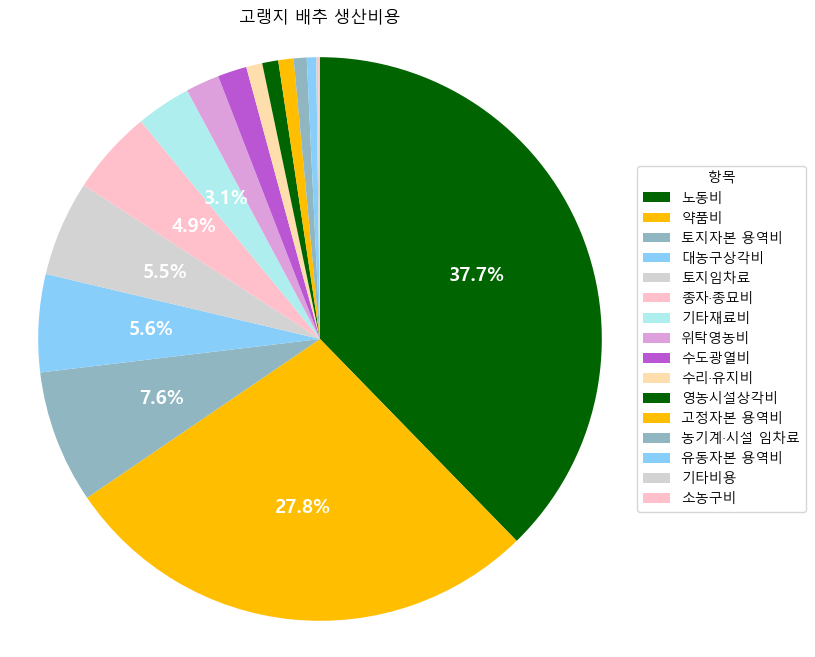

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='생산원가')

labels = df.iloc[:, 15]
sizes = df.iloc[:, 16]

# 결측값 제거 및 정렬
data = pd.DataFrame({'Labels': labels, 'Sizes': sizes})
data = data.dropna()
data = data.sort_values(by='Sizes', ascending=False)

colors = ['#006400', '#FFBE00', '#90B6C1', '#87CEFA', '#D3D3D3', '#FFC0CB', '#AFEEEE', '#DDA0DD', '#BA55D3', '#FFDEAD']

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(data['Sizes'], colors=colors[:len(data)], autopct='', startangle=90, counterclock=False)

total = sum(data['Sizes'])
for i, autotext in enumerate(autotexts):
    if i < 7:
        percent = data['Sizes'].iloc[i] / total * 100
        autotext.set_text(f'{percent:.1f}%')
        autotext.set_color('white')
        autotext.set_fontweight(BOLD)
        autotext.set_fontsize(14)

plt.legend(wedges, data['Labels'], title="항목", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('고랭지 배추 생산비용')
plt.axis('equal')

plt.show()


고랭지 배추 생산비용 그래프를 보면, 노동비가 37.7%로 가장 높고, 그 다음이 27.8%로 농약과 비료 등인 약품비임을 알 수 있다. 노동비와 약품비를 절감할 수 있다면 농가 이윤의 비율이 증가할 것이다.

다음은 이상기후로 인한 생산량 감소에 대해 분석하였다.
재배면적 당 생산량을 생산효율의 지표로 설정하였다.<br>
연도별 재배면적을 꺾은선 그래프로 시각화하였다.

C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\1580713632.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-', np.nan)  # '-'를 결측값으로 변환


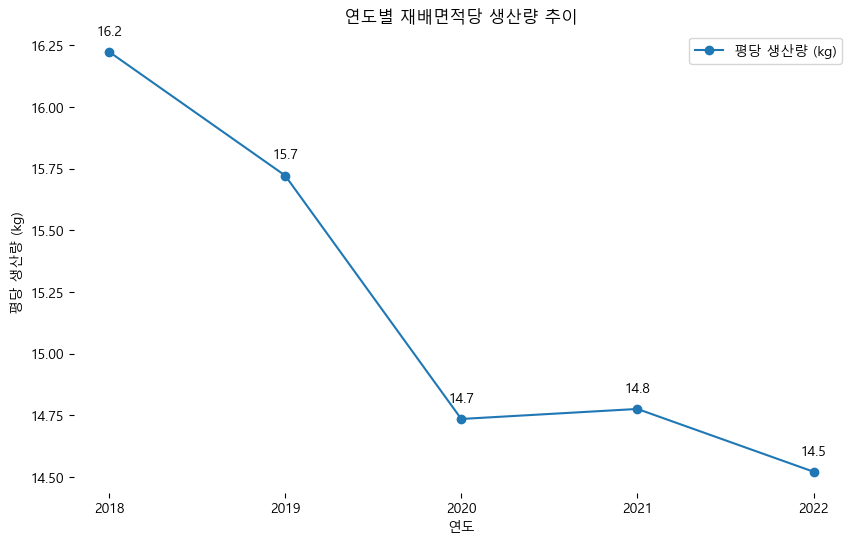

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='data1')

years = df.iloc[:, 10]  # 연도
production_per_area = df.iloc[:, 15]  # 평당 생산량 (kg)

data = pd.DataFrame({'Years': years, 'Production_per_Area': production_per_area})
data = data.replace('-', np.nan)
data = data.dropna().astype(float)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Production_per_Area'], label='평당 생산량 (kg)', marker='o')

for i, txt in enumerate(data['Production_per_Area']):
    plt.annotate(f'{txt:.1f}', (data['Years'].iloc[i], data['Production_per_Area'].iloc[i]), textcoords="offset points", xytext=(0, 12), ha='center')

plt.xticks(ticks=np.arange(int(min(data['Years'])), int(max(data['Years'])) + 1, 1), labels=[str(int(year)) for year in np.arange(int(min(data['Years'])), int(max(data['Years'])) + 1, 1)])

plt.xlabel('연도')
plt.ylabel('평당 생산량 (kg)')
plt.title('연도별 재배면적당 생산량 추이')
plt.legend()

plt.grid(False)
plt.box(False)

plt.show()

2018년부터 2022년까지의 재배면적당 생산량 그래프를 보면 지속적으로 생산효율이 감소할고 있다는 것을 확인하였다.

기후 변화가 생산효율에 끼친 영향을 분석하기 위해 강릉, 정선, 태백, 평창의 57개 농가에서 수집한 생산량, 재배면적, 재배기간(정식일~수확일) 데이터를 활용하여 단위 면적 당 생산량과 기후 요인을 분석하였다.

기후 요인 중 기온과 강수량을 지표로 삼아서 분석하였다.

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

columns_to_analyze = df.iloc[:, 8:13]

# 상관분석
correlation_matrix = columns_to_analyze.corr().round(2)

# 하삼각행렬로 출력
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
tri_df = correlation_matrix.mask(mask)

tri_df = tri_df.applymap(lambda x: '' if pd.isna(x) else f'{x:.2f}')

# 상관분석 표
styled_table = (tri_df
                .style
                .set_caption('상관분석')
                .set_table_styles([{
                    'selector': 'th',
                    'props': [('border', '1px solid black'), ('text-align', 'center')]
                }, {
                    'selector': 'td',
                    'props': [('border', '1px solid black'), ('text-align', 'center')]
                }, {
                    'selector': 'caption',
                    'props': [('font-size', '16px')]
                }])
                .set_properties(**{'border': '1px solid black', 'text-align': 'center'}))

print("상관분석:")
display(styled_table)


상관분석:


C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\1725941608.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tri_df = tri_df.applymap(lambda x: '' if pd.isna(x) else f'{x:.2f}')


,최고기온,최저기온,강수일수,30도 이상 일수,면적대비 수확량(생산효율)
최고기온,1.00,,,,
최저기온,0.21,1.00,,,
강수일수,-0.15,-0.23,1.00,,
30도 이상 일수,0.55,0.33,-0.33,1.00,
면적대비 수확량(생산효율),-0.02,-0.11,-0.30,-0.04,1.00


위 기후 요인으로 상관분석을 시행한 결과, 생산효율과 강수일수의 상관계수가 –0.3으로 가장 큰 음의 선형성을 나타냈다. 생산효율과 기후 요인들의 인과관계를 파악하기 위해서 회귀분석을 추가로 진행하였다.

In [161]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

X = df.iloc[:, 8:12]  # 독립 변수
y = df.iloc[:, 12]    # 종속 변수

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# F-검정 결과
f_pvalue = model.f_pvalue

print("\n\nF-검정 결과:")
print(f"P-value: {f_pvalue:.2f}")
if f_pvalue <= 0.05:
    print("회귀 모델이 유의미합니다 (P-value <= 0.05).")
else:
    print("회귀 모델이 유의미하지 않습니다 (P-value > 0.05).")


                            OLS Regression Results                            
Dep. Variable:         면적대비 수확량(생산효율)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.037
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.103
Time:                        23:18:35   Log-Likelihood:                -2.0091
No. Observations:                  57   AIC:                             14.02
Df Residuals:                      52   BIC:                             24.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7012      1.031      0.680      0.5

회귀 분석 결과 유의한 F값이 0.103으로 나왔는데 이는 0.05이상이므로 유의미한 회귀모델이라고 할 수 없다. 따라서 상관계수가 가장 작은 최고 기온을 제외하고 다시 회귀분석을 시행하였다.

In [ ]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

X = df.iloc[:, 9:12]  # 독립 변수
y = df.iloc[:, 12]    # 종속 변수

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# F-검정 결과
f_pvalue = model.f_pvalue

print("\n\nF-검정 결과:")
print(f"P-value: {round(f_pvalue, 2):.2f}")
if round(f_pvalue, 2) <= 0.05:
    print("회귀 모델이 유의미합니다 (P-value <= 0.05)")
else:
    print("회귀 모델이 유의미하지 않습니다 (P-value > 0.05)")


                            OLS Regression Results                            
Dep. Variable:         면적대비 수확량(생산효율)   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.758
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0512
Time:                        20:01:51   Log-Likelihood:                -2.0226
No. Observations:                  57   AIC:                             12.05
Df Residuals:                      53   BIC:                             20.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8608      0.183      4.707      0.0

그 결과 유의한 F값이 0.05로 유의한 회귀모델이라고 할 수 있다.<br>
강수일수 유의한 계수를 나타내었으므로 일 강수량이 10mm 이상인 날이 많을수록 생산효율이 감소한다는 것을 확인하였다.

생산효율과 강수일수로 분산형 그래프를 그리고 회귀계수를 확인해 보았다.

C:\Users\wwssy\AppData\Local\Temp\ipykernel_19472\3421657686.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope, intercept = model.params[1], model.params[0]


회귀계수: 기울기 = -0.02, 절편 = 0.61


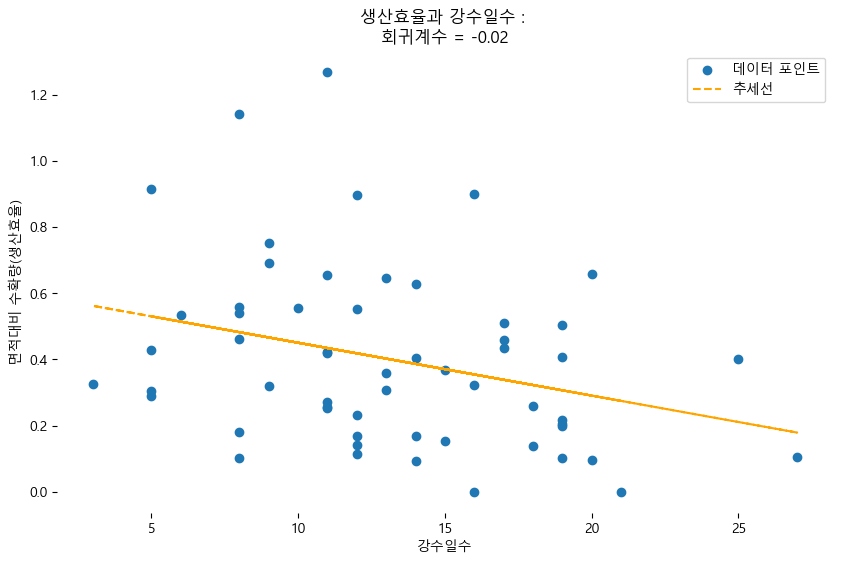

In [162]:
file_path = r'C:\DA_Class\데이터자료_우서윤.xlsx'
df = pd.read_excel(file_path, sheet_name='기후와 생산량')

x = df.iloc[:, 10]  # 강수일수
y = df.iloc[:, 12]  # 생산효율

data = pd.DataFrame({'x': x, 'y': y}).dropna()

# 회귀 분석
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()

slope, intercept = model.params[1], model.params[0]
correlation = np.corrcoef(data['x'], data['y'])[0, 1]
print(f"회귀계수: 기울기 = {slope:.2f}, 절편 = {intercept:.2f}")

data['trend'] = intercept + slope * data['x']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], label='데이터 포인트')
plt.plot(data['x'], data['trend'], label='추세선', color='Orange', linestyle='--')

plt.xlabel('강수일수')
plt.ylabel('면적대비 수확량(생산효율)')
plt.title(f'생산효율과 강수일수 : \n회귀계수 = {slope:.2f}')
plt.legend()
plt.grid(False)
plt.box(False)

plt.show()

회귀계수가 –0.02로 크지 않은 편인데 이는 같은 지역과 같은 기후 조건에서 자란 배추라도 품종이 다른 경우 생산량 차이가 나는 데이터가 있는 것으로 보아 품종도 생산효율 감소의 요인이 될 수 있다. 따라서 배추 생산효율 감소에는 기후뿐만 아니라 품종, 재배자의 숙련도, 농지의 연작 정도 등 다양한 요인이 복합적으로 작용한다는 것을 알 수 있다.